The data set looks like:
    fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

Composition (rows, colums):  (59, 7)


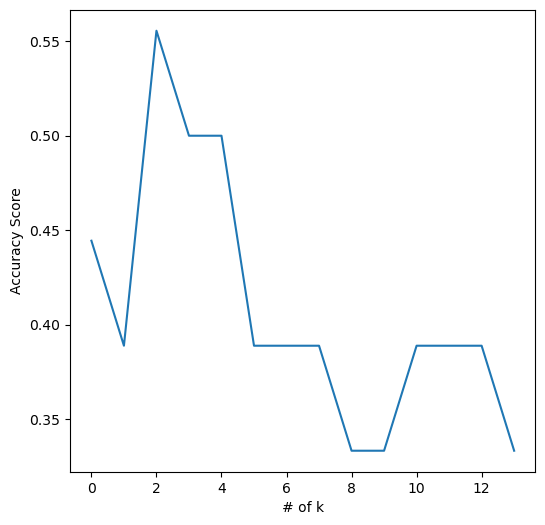


Confusion matrix: 
 [[3 0 0 1]
 [1 2 0 1]
 [0 0 2 0]
 [3 2 0 3]]

Classification Report: 
               precision    recall  f1-score   support

       apple       0.43      0.75      0.55         4
       lemon       0.50      0.50      0.50         4
    mandarin       1.00      1.00      1.00         2
      orange       0.60      0.38      0.46         8

    accuracy                           0.56        18
   macro avg       0.63      0.66      0.63        18
weighted avg       0.58      0.56      0.55        18

Prediction 1:  ['apple'] 
Prediction 2:  ['orange']


In [2]:
# K - nearest neighbours algorithm

# This program aims to classify fruits based on their mass, 
# width, and height, The dataset used for training and testing 
# is loaded from the 'fruit_data_with_colors.txt' file.
# However, this classifier is not very effective as it only 
# predicts the correct class for 56% of the fruits.
# The fruit that is most frequently misclassified is the apple
# while mandarin is always classified correctly

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# loading the data set
fruits_dataframe = pd.read_table('fruit_data_with_colors.txt')
# visualise the data
print("The data set looks like:\n", fruits_dataframe.head())
print("\nComposition (rows, colums): ", fruits_dataframe.shape)

# splitting the data into training and testing sets
x = fruits_dataframe[['mass', 'width', 'height']]
y = fruits_dataframe["fruit_name"]
# random_state parameter controls the random shuffling 
# of the data before splitting it
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                    train_size=0.7, 
                                                    test_size=0.3,
                                                    random_state=25)
accuracy_scores = []
for i in range(1,15):
    # creating the KNN classifier with k=i from 1 to 15
    knn = KNeighborsClassifier(n_neighbors=i)
    # fitting the classifier to the data
    knn.fit(X_train.values, y_train)
    # making predictions on the test data
    y_predictions = knn.predict(X_test.values)
    # creating the accuracy score array
    accuracy_scores.append(accuracy_score(y_test, y_predictions))
    
# plot the accuracy scores array to show the accuracy test
# of different values of k. 
plt.figure(figsize = (6, 6))
plt.plot(accuracy_scores)
plt.xlabel('# of k')
plt.ylabel('Accuracy Score')
plt.show()

# creating the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
# # fitting the classifier to the data
knn.fit(X_train.values, y_train)
# making predictions on the test data
y_predictions = knn.predict(X_test.values)

print("\nConfusion matrix: \n", confusion_matrix(y_test, y_predictions))
print("\nClassification Report: \n", classification_report(y_test, y_predictions))

# we can make predictions with some new input data
prediction_fruit1 = knn.predict([[170, 7.5, 7.5]])
prediction_fruit2 = knn.predict([[400, 7, 10]])
# printing the results of the the predictionson input data 
print("Prediction 1: ", prediction_fruit1, "\nPrediction 2: ", prediction_fruit2)